**TASK-2**

IMPORTING DATASETS

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

Saving World Indicators.csv to World Indicators.csv


CREATING DATAFRAMES

In [2]:
df=pd.read_csv('World Indicators.csv')

DATA WRANGLING IS REQUIRED BEFORE ANALYSIS

1.   Convert health Exp/Capita from string to float
2.   Convert GDP from string to float
3.   Convert Business Tax Rate from string to float






In [24]:
df['Health Exp/Capita'] = df['Health Exp/Capita'].apply(str).str.replace('$','').str.replace(',', '')
df['GDP'] = df['GDP'].apply(str).str.replace('$', '').str.replace(',', '')
df['Business Tax Rate'] = df['Business Tax Rate'].apply(str).str.replace('%','')

df['Health Exp/Capita'] =df['Health Exp/Capita'].astype('float')
df['GDP'] = df['GDP'].astype('float')
df['Business Tax Rate'] = df['Business Tax Rate'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


WE ARE PERFORMING THE ANALYSIS USING THE FOLLOWING FEATURES:

1.   Energy Usage
2.   Internet Usage
3.   Population Urban 



In [4]:
df1=df.iloc[:,[9,13,17,19]]
df2=df1
df2.dropna(inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Internet Usage,Mobile Phone Usage,Population Urban,Country
0,0.1,0.9,0.682,Algeria
1,0.1,0.5,0.409,Angola
2,0.0,0.8,0.423,Benin
3,0.1,1.5,0.565,Botswana
4,0.0,0.5,0.265,Burkina Faso
...,...,...,...,...
201,0.3,1.0,0.663,Suriname
202,0.6,1.4,0.089,Trinidad and Tobago
204,0.7,0.9,0.809,United States
205,0.5,1.4,0.946,Uruguay


The next step is to SCALE THE DATA

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df2.iloc[:,0:3])
df3=pd.DataFrame(X_std,columns = df2.iloc[:,0:3].columns)
df3

,Internet Usage,Mobile Phone Usage,Population Urban
0,-0.970624,-0.154061,0.479319
1,-0.970624,-1.097993,-0.666804
2,-1.324746,-0.390044,-0.608029
3,-0.970624,1.261836,-0.011877
4,-1.324746,-1.097993,-1.271353
...,...,...,...
188,-0.262380,0.081922,0.399552
189,0.799985,1.025853,-2.010245
190,1.154107,-0.154061,1.012497
191,0.445863,1.025853,1.587657


**Question-1**

K-MEANS CLUSTERING

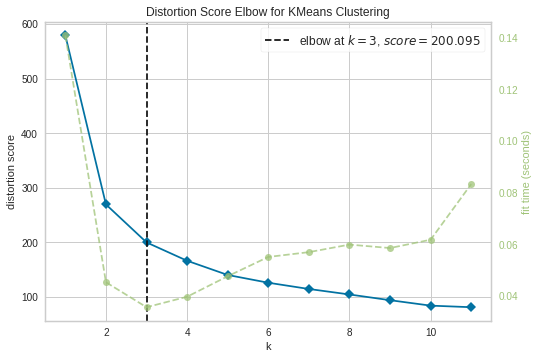

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df3)
visualizer.show()

After looking into the elbow graph, we can take k=2

HIERARCHIAL CLUSTERING

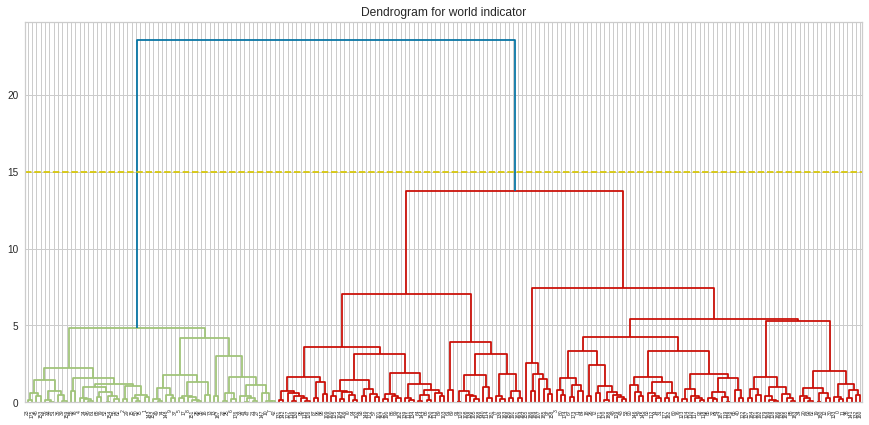

In [7]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))  
plt.title("Dendrogram for world indicator")  
dend = shc.dendrogram(shc.linkage(df3, method='ward'))
plt.axhline(y=15, color='y', linestyle='--')

Now, after looking at the above dendrogram, we can take k=2

Implementing K-Means Clustering for Analysis 

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df3)
k_clusters=kmeans.labels_
k_clusters

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
df2['Predicted Kmeans']=k_clusters
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Internet Usage,Mobile Phone Usage,Population Urban,Country,Predicted Kmeans
0,0.1,0.9,0.682,Algeria,0
1,0.1,0.5,0.409,Angola,0
2,0.0,0.8,0.423,Benin,0
3,0.1,1.5,0.565,Botswana,1
4,0.0,0.5,0.265,Burkina Faso,0
...,...,...,...,...,...
201,0.3,1.0,0.663,Suriname,1
202,0.6,1.4,0.089,Trinidad and Tobago,1
204,0.7,0.9,0.809,United States,1
205,0.5,1.4,0.946,Uruguay,1


Implementing Hierarchical Clustering for Analysis 

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster8=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
hier_clusters=cluster8.fit_predict(df3)
hier_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
df2['Predicted hier']=hier_clusters
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Internet Usage,Mobile Phone Usage,Population Urban,Country,Predicted Kmeans,Predicted hier
0,0.1,0.9,0.682,Algeria,0,0
1,0.1,0.5,0.409,Angola,0,1
2,0.0,0.8,0.423,Benin,0,1
3,0.1,1.5,0.565,Botswana,1,0
4,0.0,0.5,0.265,Burkina Faso,0,1
...,...,...,...,...,...,...
201,0.3,1.0,0.663,Suriname,1,0
202,0.6,1.4,0.089,Trinidad and Tobago,1,0
204,0.7,0.9,0.809,United States,1,0
205,0.5,1.4,0.946,Uruguay,1,0


**Question-2**

Internal Validation for K-Means

In [25]:
from sklearn.metrics import silhouette_score
s_kmeans=silhouette_score(df2.iloc[:,0:3],k_clusters, metric='euclidean', random_state=None)

Internal Validation for Hierarchical Clustering 

In [26]:
from sklearn.metrics import silhouette_score
s_hier=silhouette_score(df2.iloc[:,0:3],hier_clusters, metric='euclidean', random_state=None)

Reporting the cluster quality using the Internal validation metrics

In [27]:
row=['SILHOUETTE K-MEANS','SILHOUETTE HIERARCHAL']
data=[s_kmeans,s_hier]
frame=list(zip(row,data))
eval=pd.DataFrame(frame,columns=('METRIC AND CLUSTER','SCORE'))
eval

,METRIC AND CLUSTER,SCORE
0,SILHOUETTE K-MEANS,0.437369
1,SILHOUETTE HIERARCHAL,0.437530


According to the above internal evaluation scores,the best pick would be hierarchical clustering. As the cluster quality with best score among both is hierarchical clustering

**QUESTION-3**

Now all the countries with internet usage of above 0.4 is grouped under one cluster. It is also possible that the countries that have high internet usage also have high mobile phone usage and high urban population. Hence they are all grouped into one cluster.

In [16]:
df3=df2.iloc[:,[0,1,2,3,5]]
df3[df3['Internet Usage']>0.4]

,Internet Usage,Mobile Phone Usage,Population Urban,Country,Predicted hier
32,0.5,1.1,0.582,Morocco,0
55,0.5,1.1,0.536,Azerbaijan,0
58,0.6,1.1,0.759,Brunei Darussalam,0
62,0.7,2.2,1.000,"Hong Kong SAR, China",0
65,0.8,1.0,0.912,Japan,0
...,...,...,...,...,...
197,0.8,1.5,0.318,St. Kitts and Nevis,0
198,0.5,1.2,0.185,St. Lucia,0
202,0.6,1.4,0.089,Trinidad and Tobago,0
204,0.7,0.9,0.809,United States,0


Now, contries with internet usage less than 0.3 also will have less mobile phone usage and less urban population. 

In [17]:
df3=df2.iloc[:,[0,1,2,3,5]]
df3[df3['Internet Usage']<0.3]

,Internet Usage,Mobile Phone Usage,Population Urban,Country,Predicted hier
0,0.1,0.9,0.682,Algeria,0
1,0.1,0.5,0.409,Angola,1
2,0.0,0.8,0.423,Benin,1
3,0.1,1.5,0.565,Botswana,0
4,0.0,0.5,0.265,Burkina Faso,1
...,...,...,...,...,...
185,0.1,1.3,0.498,Guatemala,0
187,0.1,0.4,0.535,Haiti,1
188,0.2,1.0,0.523,Honduras,0
191,0.1,0.8,0.575,Nicaragua,0


Hence, we can say that there is direct proportionality between mobile phone usage and urban population. 

LIST OF ALL COUNTRIES IN FIRST CLUSTER

In [18]:
df3[df3['Predicted hier']==0]

,Internet Usage,Mobile Phone Usage,Population Urban,Country,Predicted hier
0,0.1,0.9,0.682,Algeria,0
3,0.1,1.5,0.565,Botswana,0
11,0.1,0.9,0.637,"Congo, Rep.",0
12,0.0,0.9,0.513,Cote d'Ivoire,0
14,0.4,1.1,0.430,"Egypt, Arab Rep.",0
...,...,...,...,...,...
201,0.3,1.0,0.663,Suriname,0
202,0.6,1.4,0.089,Trinidad and Tobago,0
204,0.7,0.9,0.809,United States,0
205,0.5,1.4,0.946,Uruguay,0


LIST OF ALL COUNTRIES IN SECOND CLUSTER

In [19]:
df3[df3['Predicted hier']==1]

,Internet Usage,Mobile Phone Usage,Population Urban,Country,Predicted hier
1,0.1,0.5,0.409,Angola,1
2,0.0,0.8,0.423,Benin,1
4,0.0,0.5,0.265,Burkina Faso,1
5,0.0,0.2,0.109,Burundi,1
6,0.1,0.5,0.521,Cameroon,1
7,0.0,0.2,0.390,Central African Republic,1
8,0.0,0.3,0.220,Chad,1
9,0.1,0.3,0.280,Comoros,1
10,0.0,0.2,0.404,"Congo, Dem. Rep.",1
13,0.1,0.2,0.771,Djibouti,1


**QUESTION-4**

Importing libraries

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Generating scatter plot between Urban population and Internet Usage

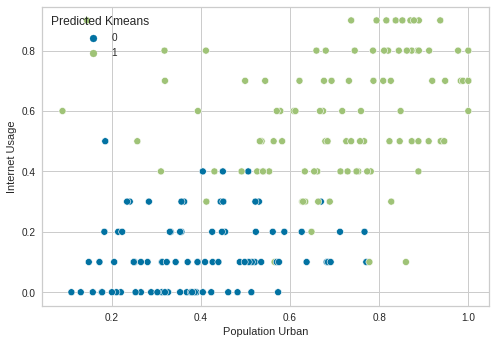

In [21]:
sns.scatterplot(x='Population Urban', y='Internet Usage', data=df2, hue=df2['Predicted Kmeans'])

Generating scatter plot between Urban population and Mobile phone usage

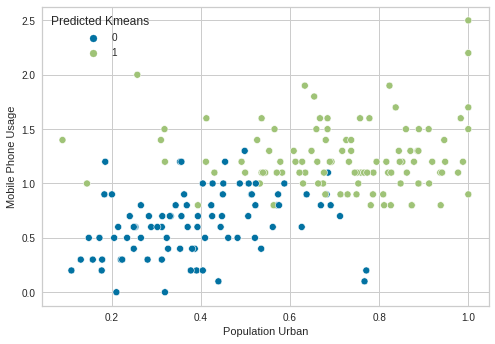

In [22]:
sns.scatterplot(x='Population Urban', y='Mobile Phone Usage', data=df2, hue=df2['Predicted Kmeans'])

Generating scatter plot between Internet Usage and Mobile phone usage

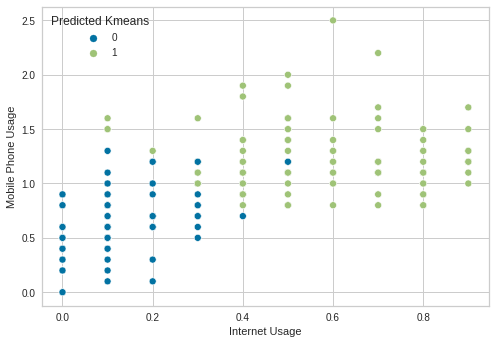

In [23]:
sns.scatterplot(x='Internet Usage', y='Mobile Phone Usage', data=df2, hue=df2['Predicted Kmeans'])